In [2]:
import sys
sys.path.insert(1, "../python/architecture")
sys.path.insert(2, "../python/functions")

In [50]:
from model_functions import nn_load
from plotting_functions import nn_plot_mse, nn_plot_mse_many, nn_plot_particle_mse, nn_plot_final_cosine_sim, nn_plot_cosine_sims
import reproducible
import no_gpu

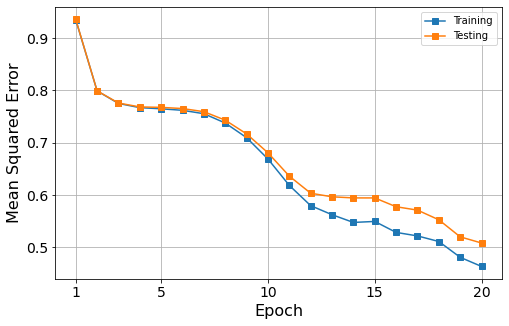

In [3]:
model = nn_load("../models/wine/wine_enkf_full_E20_B200_P1000_H2.h5")
nn_plot_mse(model,
            mse_mean = None,
            start_epoch = 1,
            tick_diff = 5,
            marker = True,
            savefig = False,
            file = "../img/wine/wine_enkf.png")

In [14]:
model_batches_dict = {}
batches = [100, 200, 500, 1000, 2000, 4163]

for b in batches:
    model_batches_dict["batch_size: {}".format(b)] = nn_load("../models/wine/wine_enkf_full_E20_B{}_P100_H2.h5".format(b))

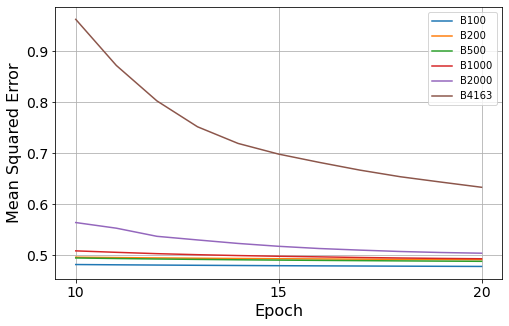

In [20]:
model_batches_list = list(model_batches_dict.values())
label_batches_list = ["B{}".format(list(model_batches_dict.keys())[i].split(": ")[1]) for i in range(len(model_batches_dict))]

nn_plot_mse_many(model_batches_list,
                 label_batches_list,
                 train_test = "train",
                 mse_mean = None,
                 start_epoch = 10,
                 tick_diff = 5,
                 savefig = False,
                 file = "../img/wine/wine_enkf_P100_batches_10.png")

In [16]:
model_particles_dict = {}
particles = [100, 200, 300, 400, 500]

for p in particles:
    model_particles_dict["batch_size: {}".format(p)] = nn_load("../models/wine/wine_enkf_full_E20_B100_P{}_H2.h5".format(p))

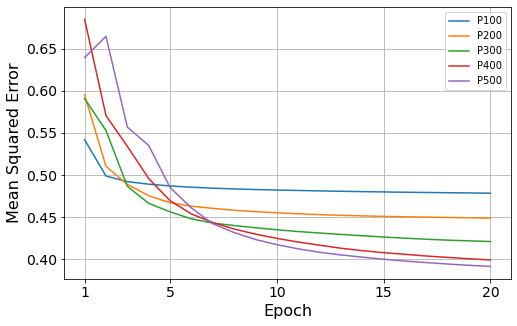

In [21]:
model_particles_list = list(model_particles_dict.values())
label_particles_list = ["P{}".format(list(model_particles_dict.keys())[i].split(": ")[1]) for i in range(len(model_particles_dict))]

nn_plot_mse_many(model_particles_list,
                 label_particles_list,
                 train_test = "train",
                 mse_mean = None,
                 start_epoch = 1,
                 tick_diff = 5,
                 savefig = False,
                 file = "../img/wine/wine_enkf_B100_particles.png")

In [26]:
model_1 = nn_load("../models/wine/wine_enkf_full_E20_B100_P100_H2.h5")
model_2 = nn_load("../models/wine/wine_sgd_E20_B100.h5")

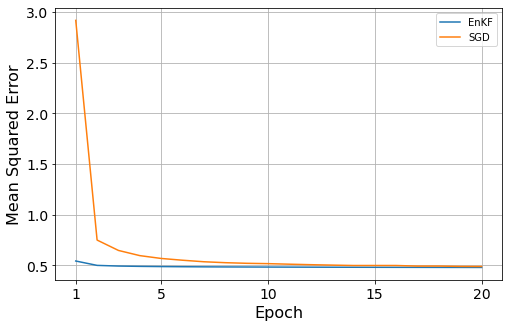

In [30]:
nn_plot_mse_many([model_1, model_2],
                 ["EnKF", "SGD"],
                 train_test = "train",
                 mse_mean = None,
                 start_epoch = 1,
                 tick_diff = 5,
                 savefig = False,
                 file = "../img/wine/wine_enkf_sgd_B100.png")

In [36]:
model = "../objects/wine/wine_enkf_full_E20_B100_P100_h2.pckl"

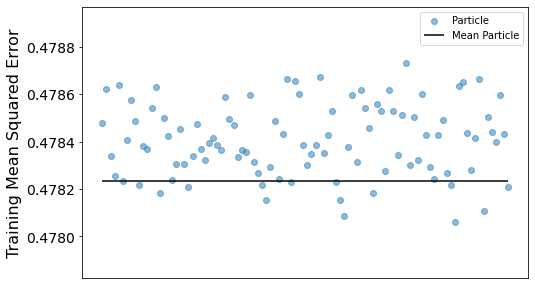

In [35]:
nn_plot_particle_mse(model,
                     train_test = "train",
                     rel_limit_exceed = 0.0005,
                     return_mses = False,
                     save = None)#"../img/wine/wine_enkf_particle_mses_B100_P100.png")

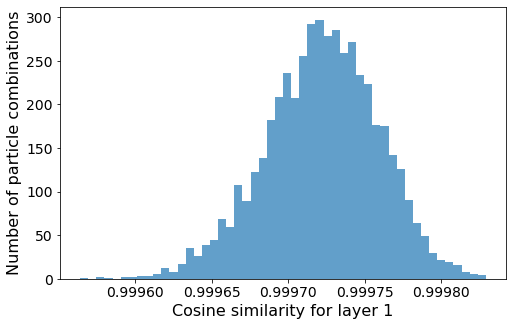

In [49]:
nn_plot_final_cosine_sim(model,
                         layer = 1,
                         bins = 50,
                         save = None,#"../img/wine/wine_enkf_cosine_hist_layer1_B100_P100.png",
                         return_sims = False)

In [54]:
model_1 = "../objects/wine/wine_enkf_full_E20_B100_P100_h2.pckl"
model_2 = "../objects/wine/wine_enkf_full_E20_B100_P200_h2.pckl"
model_3 = "../objects/wine/wine_enkf_full_E20_B100_P300_h2.pckl"
model_4 = "../objects/wine/wine_enkf_full_E20_B100_P400_h2.pckl"
model_5 = "../objects/wine/wine_enkf_full_E20_B100_P500_h2.pckl"

model_list = [model_1, model_2, model_3, model_4, model_5]
particles = [100, 200, 300, 400, 500]

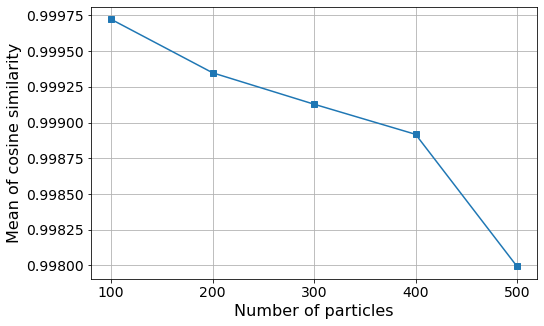

In [68]:
nn_plot_cosine_sims(model_list,
                    xlabel = "Number of particles",
                    xticks = particles,
                    layer = 1,
                    bins = 50,
                    save = None)#"../img/wine/wine_enkf_particle_cosines_B100.png")